<div class = "alert-success">
Shruthi Saxena <br>
saxenasu@mail.uc.edu <br>
Final Project <br>
Spring 2021 <br>
04/21/2021 18:00:00 <br>
SPECIAL TOPICS IN BANA <br>
BANA8090
</div>

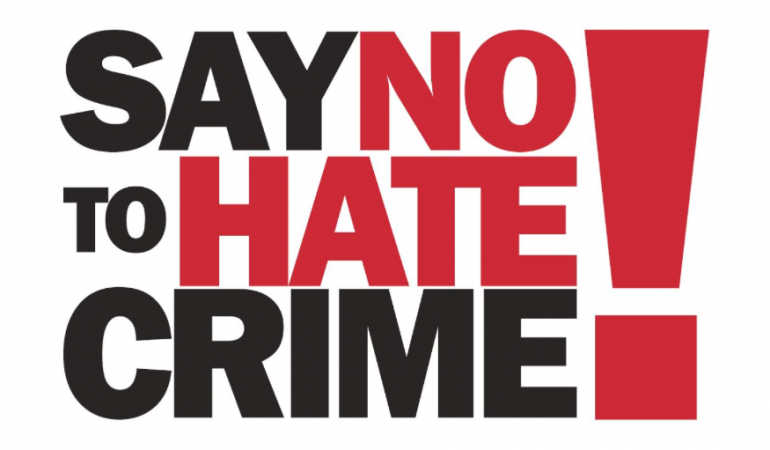

In [1]:
from IPython import display
display.Image("hate_crime.png")

### Introduction:

Having a knack for psychology, I am always intrigued to know more about other cultures, preferences, lifestyles, food styles and how the conditioning in early life impacts an adult. Also, being an empath makes it a bit difficult for me to assimilate the unfortunate things that happen around the world. Recently, Anti-Asian Hate Crimes are in rise post covid which made me curious to know a bit more about the history of hate crimes in US. United States is a land of cultural diversity. But finding the key to achieving harmonious co-existence among ethnic groups with different traditions and ethnicity in a multicultural country like US is a major problem. To know more about the nuances of it, **Hate Crime and Policing** is picked up as a topic for my Final project.

**Data Source** - The datasets were obtained from FBI Crime Data Explorer website, an official website of United States government

Datasets Link - https://crime-data-explorer.fr.cloud.gov/downloads-and-docs (Links to an external site.)

**Hate Crime** - The Hate Crime Statistics dataset provides annual statistics (of US states) on the number of incidents, offenses, victims, and offenders in reported crimes that are motivated in whole, or in part, by an offender’s bias against the victim’s perceived race, gender, gender identity, religion, disability, sexual orientation, or ethnicity. This dataset has Information about Hate Crime Data at Incident level. It also has single-bias and multiple-bias hate crimes. A single-bias incident is an incident in which one or more offense types are motivated by the same bias. Multiple-bias incident is the one with one or more offense types are motivated by two or more biases.

For this project, 
* State level data was used. Other-lower level data was rejected. 
* Only Single Bias Hate crimes were used. 

**Police Employee data** - It is made up of data collected annually about law enforcement officers and civilians employed by law enforcement agencies of US states. The dataset contains information about the number of officers and civilians employed and the rate of police employees per a state’s population.

**Data Merge** - Both the datasets had 2 common columns - **State Postal Code** and **Years**. These were used as keys for the join. 

### Problem Statement: 

The goal of this project is to: 

* Provide a high-level overview of history of Hate Crimes in US States
* Understanding different Bias classification in hate crimes 
* A little deeper details of hate crimes in Ohio in the last 5 years
* Clustering the States based on its total hate crimes and policing in 2019 and inferring its safety level

### Addressing the problem and approaching the datasets: 

To answer the above problem statement we will employ the below techniques:

**Data Import** – Importing both the datasets using Pandas package.

**Data Cleaning** - Data from both the datasets are stored into a dataframe which is in a consistent form. Each column is a variable and each row is observation. Not all columns from the datasets are used.

**Data Transformation** - In this step, we remove duplicate records, deleted insignificant variables and created new variables.

**Data Visualization** - Here, Graphs and Plots are used to gain a  little deeper insight of Hate Crimes in different states over the years.

**Model** - Applying k-means clustering algorithm - This helps in grouping different states by identifying a similar pattern among them and in predicting which states were comparatively safer in 2019. 


--------------------------------------------------------------------------------------------------------------------------

### Packages Imported

In [2]:
import pandas as pd # For Data Analysis
import numpy as np # For Data Transformations
import seaborn as sns # For Data Visualizations
import matplotlib.pyplot as plt # For Plotting of Graphs, Charts etc.
from matplotlib import rcParams # For Sizing the charts
from sklearn import preprocessing # For Standardization
from sklearn.cluster import KMeans # For K-Means Cluster model

### Data Import- Hate Crime Dataset

In [3]:
hate_crime_raw = pd.read_csv("hate_crime.csv", low_memory=False, index_col= "INCIDENT_ID" )

This Dataset has incident level data. Here, INCIDENT_ID is the unique key. Hence, Indexing on that column

In [4]:
hate_crime_raw.columns = hate_crime_raw.columns.str.lower()
hate_crime_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209442 entries, 3015 to 705012
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   data_year                 209442 non-null  int64  
 1   ori                       209442 non-null  object 
 2   pub_agency_name           209442 non-null  object 
 3   pub_agency_unit           5956 non-null    object 
 4   agency_type_name          209442 non-null  object 
 5   state_abbr                209442 non-null  object 
 6   state_name                209442 non-null  object 
 7   division_name             209442 non-null  object 
 8   region_name               209442 non-null  object 
 9   population_group_code     209442 non-null  object 
 10  population_group_desc     209442 non-null  object 
 11  incident_date             209442 non-null  object 
 12  adult_victim_count        42562 non-null   float64
 13  juvenile_victim_count     41629 non-null 

Hate_Crime dataset has 27 columns ranging from agency details about the origin of the complaint files, Offender’s Ethnicity details, Victim’s age-related classifications etc. Not all columns are used.  Granularity of the project stays only till State level. Other columns are dropped. 

In [5]:
hate_crime_raw = hate_crime_raw.drop(hate_crime_raw.columns[[1,2,3,4,7,9,10,12,13,14,15,16,17,18,19,21,22,25]], axis=1)
hate_crime_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209442 entries, 3015 to 705012
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   data_year      209442 non-null  int64 
 1   state_abbr     209442 non-null  object
 2   state_name     209442 non-null  object
 3   region_name    209442 non-null  object
 4   incident_date  209442 non-null  object
 5   offense_name   209442 non-null  object
 6   bias_desc      209442 non-null  object
 7   victim_types   209442 non-null  object
 8   multiple_bias  209442 non-null  object
dtypes: int64(1), object(8)
memory usage: 16.0+ MB


### Details of Hate Crime columns:

**data_year** – Year of the reported incident      
**state_abbr** – State’s Postal Code      
**state_name** – State’s Name      
**region_name** – Region to which the state belongs to     
**incident_date** – Date at which the incident was reported  
**offense_name** – Name of the offense as per the FBI norms<br>
**bias_desc** – Offender’s Bias        
**victim_types** – the victim of a hate crime can be an individual, a business/financial institution, a government entity, a religious organization, or society/public as a whole <br>
**multiple_bias** – There are single-bias and multiple-bias hate crimes. A single-bias incident is an incident in which one or more offense types are motivated by the same bias. Multiple-bias incident is the one with one or more offense types are motivated by two or more biases

### Data Cleaning- Hate Crime Dataset

In [6]:
hate_crime_raw.isna().sum()

data_year        0
state_abbr       0
state_name       0
region_name      0
incident_date    0
offense_name     0
bias_desc        0
victim_types     0
multiple_bias    0
dtype: int64

There are no null values. 

In [7]:
hate_crime_clean = hate_crime_raw.copy(deep= True)
hate_crime_clean.head(10)

,data_year,state_abbr,state_name,region_name,incident_date,offense_name,bias_desc,victim_types,multiple_bias
INCIDENT_ID,,,,,,,,,
3015,1991,AR,Arkansas,South,31-AUG-91,Intimidation,Anti-Black or African American,Individual,S
3016,1991,AR,Arkansas,South,19-SEP-91,Simple Assault,Anti-White,Individual,S
43,1991,AR,Arkansas,South,04-JUL-91,Aggravated Assault,Anti-Black or African American,Individual,S
44,1991,AR,Arkansas,South,24-DEC-91,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White,Individual,S
3017,1991,AR,Arkansas,South,23-DEC-91,Aggravated Assault,Anti-White,Individual,S
3018,1991,AR,Arkansas,South,27-JUL-91,Robbery,Anti-White,Individual,S
3019,1991,AR,Arkansas,South,14-NOV-91,Aggravated Assault,Anti-White,Individual,S
45,1991,AR,Arkansas,South,10-JUL-91,Aggravated Assault;Murder and Nonnegligent Man...,Anti-White,Individual,S
46,1991,AR,Arkansas,South,06-OCT-91,Intimidation,Anti-White,Individual,S


Thus, the Hate Crime dataset is now clean and taken for further analysis

### Data Transformation- Hate Crime Dataset

In [8]:
hate_crime_clean['multiple_bias'].value_counts()

S    208793
M       649
Name: multiple_bias, dtype: int64

On checking the frequency of **multiple_bias** column, there were 208793 incidents reported for Single Bias. Thus, it was decided to take up only Single Bias incidents for the Analysis. 

In [9]:
single_bias = hate_crime_clean[hate_crime_clean['multiple_bias'] == 'S']

In [10]:
single_bias_count = single_bias.groupby('bias_desc')['bias_desc'].count().sort_values(ascending=False)
print(single_bias_count)

bias_desc
Anti-Black or African American                               71227
Anti-Jewish                                                  27153
Anti-White                                                   24063
Anti-Gay (Male)                                              21097
Anti-Hispanic or Latino                                      13400
Anti-Other Race/Ethnicity/Ancestry                           10438
Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)     6383
Anti-Asian                                                    6097
Anti-Multiple Races, Group                                    4992
Anti-Lesbian (Female)                                         4390
Anti-Islamic (Muslim)                                         3786
Anti-Other Religion                                           3429
Anti-American Indian or Alaska Native                         2286
Anti-Catholic                                                 1543
Anti-Protestant                                     

Of all the Single Bias Incidents reported from 1991 to 2019, **Anti-Black or African American community** has endured the highest number of hate crimes againt them with more than 71,000 in count. That was followed by **Anti-Jewish**, **Anti-White** and **Anti-Gay (Male)**. Additionally, it can be noted that **Anti-Asian** community endured around 6097 reported crimes before covid.

* There is one row with Unknown Offender's Bias. It is dropped in the next step

In [11]:
single_bias_gp = single_bias.pivot_table(values = 'incident_date', 
                                index = ['data_year','region_name','state_abbr', 'state_name'],
                               columns = ['bias_desc'], aggfunc = 'count', fill_value = 0)
single_bias_gp = single_bias_gp.reset_index(drop = False)
single_bias_gp = single_bias_gp.iloc[: , :-1]
single_bias_gp.columns = single_bias_gp.columns.str.replace(',','_')
single_bias_gp.columns = single_bias_gp.columns.str.replace(' ','_')
single_bias_gp.columns = single_bias_gp.columns.str.replace('__','_')
single_bias_gp.columns = single_bias_gp.columns.str.replace('-','_')
single_bias_gp.columns = single_bias_gp.columns.str.lower()
single_bias_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 38 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   data_year                                               1389 non-null   int64 
 1   region_name                                             1389 non-null   object
 2   state_abbr                                              1389 non-null   object
 3   state_name                                              1389 non-null   object
 4   anti_american_indian_or_alaska_native                   1389 non-null   int64 
 5   anti_arab                                               1389 non-null   int64 
 6   anti_asian                                              1389 non-null   int64 
 7   anti_atheism/agnosticism                                1389 non-null   int64 
 8   anti_bisexual                                   

* Single Bias columns are pivoted over **bias_desc** and new columns with respect to various biases are created.
* It is also devoid of any null values.
* All column names are converted to snake_case for an uniform analysis
* Such is the transformation of Hate Crimes data and is now ready to merge with respective policing data.

### Data Import- Police Employee Dataset

In [12]:
policing_raw = pd.read_csv("pe_1960_2019.csv", low_memory=False)

In [13]:
policing_raw.columns= policing_raw.columns.str.strip().str.lower()
policing_raw.rename(columns = {'state_postal_abbr':'state_abbr'}, inplace = True)
policing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_abbr              3540 non-null   object 
 1   data_year               3540 non-null   int64  
 2   officer_count           2517 non-null   float64
 3   officer_rate_per_1000   2500 non-null   float64
 4   civilian_count          2517 non-null   float64
 5   civilian_rate_per_1000  2500 non-null   float64
 6   population              3540 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 193.7+ KB


* Police Employee data is imported and all column names are converted to snake_case
* It can be seen that the data has null values too.

### Details of Police Employee columns:

**state_abbr** – State’s Postal Code      
**data_year** – Year       
**officer_count** – Number of full-time sworn police employees in that year    
**officer_rate_per_1000** – Number of full-time sworn police employees per 1000 people  
**civilian_count** – Number of civilian law enforcement employees served in that year <br>
**civilian_rate_per_1000** – Number of civilian law enforcement employees per 1000       
**population** – Population of the state in that year

### Data Cleaning and Data Transformation- Police Employee Dataset

In [14]:
policing_raw[['data_year']]

,data_year
0,1960
1,1961
2,1962
3,1963
4,1964
...,...
3535,2015
3536,2016
3537,2017
3538,2018


It can be seen that this dataset has data ranging from years 1960 to 2019

In [15]:
policing = policing_raw[policing_raw['data_year'] > 1990]
policing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1711 entries, 31 to 3539
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_abbr              1711 non-null   object 
 1   data_year               1711 non-null   int64  
 2   officer_count           1498 non-null   float64
 3   officer_rate_per_1000   1481 non-null   float64
 4   civilian_count          1498 non-null   float64
 5   civilian_rate_per_1000  1481 non-null   float64
 6   population              1711 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 106.9+ KB


The **data_year** in Hate Crime ranges from 1991 to 2019. Thus, the Police Employee data is filtered and only 1991 onwards data is taken for further analysis

In [16]:
policing.head(10)

,state_abbr,data_year,officer_count,officer_rate_per_1000,civilian_count,civilian_rate_per_1000,population
31,AK,1991,1034.0,1.81,614.0,1.08,570000
32,AK,1992,1024.0,1.74,552.0,0.94,587000
33,AK,1993,1082.0,1.81,615.0,1.03,599000
34,AK,1994,1073.0,1.77,578.0,0.95,606000
35,AK,1995,1134.0,1.88,637.0,1.05,604000
36,AK,1996,1156.0,1.90,653.0,1.08,607000
37,AK,1997,857.0,1.41,444.0,0.73,609000
38,AK,1998,1113.0,1.81,659.0,1.07,614000
39,AK,1999,1169.0,1.89,688.0,1.11,619000
40,AK,2000,1158.0,1.85,675.0,1.08,626932


The two desparate datasets are now ready to merge.

### Data Merge- Joining the two datasets

In [17]:
hate_crime_and_policing = single_bias_gp.merge(policing,  how='inner', left_on=['data_year','state_abbr'], right_on = ['data_year','state_abbr'])
hate_crime_and_policing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1364
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   data_year                                               1365 non-null   int64  
 1   region_name                                             1365 non-null   object 
 2   state_abbr                                              1365 non-null   object 
 3   state_name                                              1365 non-null   object 
 4   anti_american_indian_or_alaska_native                   1365 non-null   int64  
 5   anti_arab                                               1365 non-null   int64  
 6   anti_asian                                              1365 non-null   int64  
 7   anti_atheism/agnosticism                                1365 non-null   int64  
 8   anti_bisexual                         

* Both the datasets had 2 common columns - **state_abbr** and **data_year** and were joined on the same. It can be seen from the above output that the merge was successful and columns 38-42 are added from Police Employee data.
* However, there are few null values in officer and civilian related columns and needed to be rectified.

### Data Cleaning- *hate_crime_and_policing* dataset

In [18]:
hate_crime_and_policing[hate_crime_and_policing['officer_count'].isnull() | 
                        hate_crime_and_policing['officer_rate_per_1000'].isnull() | 
                        hate_crime_and_policing['civilian_count'].isnull() |
                        hate_crime_and_policing['civilian_rate_per_1000'].isnull()]

,data_year,region_name,state_abbr,state_name,anti_american_indian_or_alaska_native,anti_arab,anti_asian,anti_atheism/agnosticism,anti_bisexual,anti_black_or_african_american,...,anti_physical_disability,anti_protestant,anti_sikh,anti_transgender,anti_white,officer_count,officer_rate_per_1000,civilian_count,civilian_rate_per_1000,population
713,2006,U.S. Territories,GM,Guam,0,0,2,0,0,1,...,0,0,0,0,1,NaN,NaN,NaN,NaN,0
1152,2015,U.S. Territories,GM,Guam,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,0
1234,2017,Other,FS,Federal,0,0,0,0,0,1,...,0,0,0,0,0,NaN,NaN,NaN,NaN,0
1284,2018,Other,FS,Federal,0,1,0,0,0,6,...,1,0,0,0,1,NaN,NaN,NaN,NaN,0
1334,2019,Other,FS,Federal,0,1,0,1,0,11,...,0,0,0,1,3,260.0,NaN,17.0,NaN,0


On checking the null values, it is found that they belonged to US.Territory **Guam** and a state name **Federal**. Not much details of these were provided in the Data source websites. Thus, it was decided to drop these rows. Further analysis was done solely on 50 states of US.

In [19]:
print(hate_crime_and_policing.state_name.nunique())
print(hate_crime_and_policing['state_name'].unique())

52
['Iowa' 'Illinois' 'Kansas' 'Minnesota' 'Missouri' 'Ohio' 'Wisconsin'
 'Connecticut' 'Massachusetts' 'New Jersey' 'New York' 'Pennsylvania'
 'Arkansas' 'District of Columbia' 'Delaware' 'Georgia' 'Maryland'
 'Mississippi' 'Oklahoma' 'Tennessee' 'Texas' 'Virginia' 'Arizona'
 'California' 'Colorado' 'Idaho' 'Nevada' 'Oregon' 'Washington' 'Indiana'
 'Michigan' 'North Dakota' 'Maine' 'Rhode Island' 'Alabama' 'Florida'
 'Kentucky' 'Louisiana' 'North Carolina' 'South Carolina' 'Utah' 'Wyoming'
 'South Dakota' 'Vermont' 'Alaska' 'Montana' 'New Mexico' 'New Hampshire'
 'West Virginia' 'Guam' 'Federal' 'Hawaii']


The data was further checked for anymore State related discrepancy. Here, Guam and Federal can be seen at the last row. 

In [20]:
hate_crime_and_policing[(hate_crime_and_policing['state_name'] == "Guam") | 
                        (hate_crime_and_policing['state_name'] == "Federal")]

,data_year,region_name,state_abbr,state_name,anti_american_indian_or_alaska_native,anti_arab,anti_asian,anti_atheism/agnosticism,anti_bisexual,anti_black_or_african_american,...,anti_physical_disability,anti_protestant,anti_sikh,anti_transgender,anti_white,officer_count,officer_rate_per_1000,civilian_count,civilian_rate_per_1000,population
713,2006,U.S. Territories,GM,Guam,0,0,2,0,0,1,...,0,0,0,0,1,NaN,NaN,NaN,NaN,0
1152,2015,U.S. Territories,GM,Guam,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,0
1234,2017,Other,FS,Federal,0,0,0,0,0,1,...,0,0,0,0,0,NaN,NaN,NaN,NaN,0
1284,2018,Other,FS,Federal,0,1,0,0,0,6,...,1,0,0,0,1,NaN,NaN,NaN,NaN,0
1334,2019,Other,FS,Federal,0,1,0,1,0,11,...,0,0,0,1,3,260.0,NaN,17.0,NaN,0


The joint dataset was filtered only on **Guam** and **Federal** rows. It was those same 5 rows that had **null** values on Officer and Civilian columns.

In [21]:
hate_crime_and_policing = hate_crime_and_policing.dropna()
print(hate_crime_and_policing.state_name.nunique())
print(pd.isnull(hate_crime_and_policing).sum())
#hate_crime_and_policing.to_csv("hate_crime_and_policing.csv")

50
data_year                                                 0
region_name                                               0
state_abbr                                                0
state_name                                                0
anti_american_indian_or_alaska_native                     0
anti_arab                                                 0
anti_asian                                                0
anti_atheism/agnosticism                                  0
anti_bisexual                                             0
anti_black_or_african_american                            0
anti_buddhist                                             0
anti_catholic                                             0
anti_eastern_orthodox_(russian_greek_other)               0
anti_female                                               0
anti_gay_(male)                                           0
anti_gender_non_conforming                                0
anti_heterosexual                    

* Here, the null/NaN rows are dropped. This simulataneously took care of State related discrepancy
* The number of unique State_Names are now 50. 
* Additionally, there were no null columns and now the data is 100% ready for transformations and visualization

### Clean Data

In [22]:
hate_crime_and_policing['total_crimes']=hate_crime_and_policing.iloc[:,4:37].sum(axis=1)
hate_crime_and_policing['population_in_mil'] = round(hate_crime_and_policing['population']/100000,2)
hate_crime_and_policing.head(5)

,data_year,region_name,state_abbr,state_name,anti_american_indian_or_alaska_native,anti_arab,anti_asian,anti_atheism/agnosticism,anti_bisexual,anti_black_or_african_american,...,anti_sikh,anti_transgender,anti_white,officer_count,officer_rate_per_1000,civilian_count,civilian_rate_per_1000,population,total_crimes,population_in_mil
0,1991,Midwest,IA,Iowa,1,0,3,0,0,39,...,0,0,8,4906.0,1.56,1849.0,0.59,3138015,81,31.38
1,1991,Midwest,IL,Illinois,1,16,2,0,0,41,...,0,0,46,29824.0,2.53,9724.0,0.82,11790516,110,117.91
2,1991,Midwest,KS,Kansas,0,0,1,0,0,2,...,0,0,0,5530.0,2.22,2037.0,0.82,2496051,6,24.96
3,1991,Midwest,MN,Minnesota,3,1,23,0,0,57,...,0,0,89,6736.0,1.51,2700.0,0.61,4448238,136,44.48
4,1991,Midwest,MO,Missouri,0,0,7,0,0,67,...,0,0,31,9954.0,1.90,3923.0,0.75,5225315,103,52.25


* Two new columns were added as follows:
    * **total_crimes** - Total number of Single Bias hate crimes reported in each state
    * **population_in_mil** - Population in Millions
* Now, the **hate_crime_and_policing** data is clean and ready for visualization

----------------------------------------------------------------------------------------------------------------------------

### Data Visualization and Plots

### 1) Time Series plot of Total Single Bias Hate Crimes and Population(in million) in US over the years

Text(0.5, 1.0, 'Time Series plot of Total Single Bias Hate Crimes and Population')

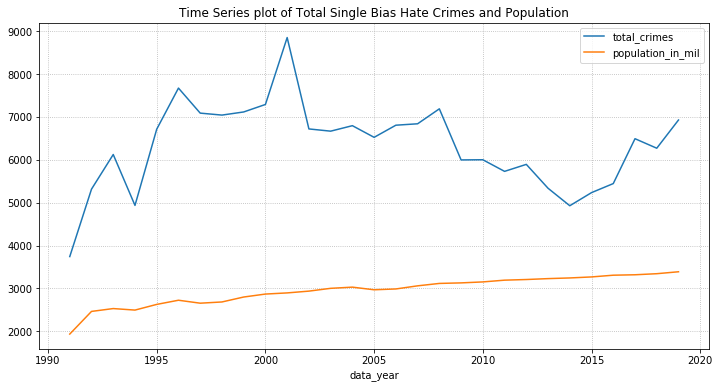

In [23]:
rcParams['figure.figsize'] = 12,6
years_crime_pop = hate_crime_and_policing.groupby("data_year")[["total_crimes", "population_in_mil"]].agg(sum)
years_crime_pop.plot()
plt.grid(True, linestyle = ":")
plt.title("Time Series plot of Total Single Bias Hate Crimes and Population")

#### Inference:

As population increased over the years in US, number of reported single bias hate crimes fluctuated. A significant peak can be seen in the year 2002 owing to the increase in discrimination against American Arabs, Sikhs and Muslims post 9/11 attack in 2001. 

Additionally, It can also be seen that the number of reported single bias hate crimes have been on rise since 2014.
The increase may be the result of not just better reporting by police departments but also many people coming forward to report it to a police employee. However, law enforcement officials and advocacy groups don’t doubt that hate crimes are on the rise. Recent hate crimes of Anti-Asian bias stands a good testament to it.

https://apnews.com/article/hate-crimes-rise-fbi-data-ebbcadca8458aba96575da905650120d

### 2) Total Single Bias Hate Crimes from 2000 to 2019 (First 10 highest states)

Text(0.5, 1.0, 'Total Single Bias Hate Crimes from 2000 to 2019 (First 10 States)')

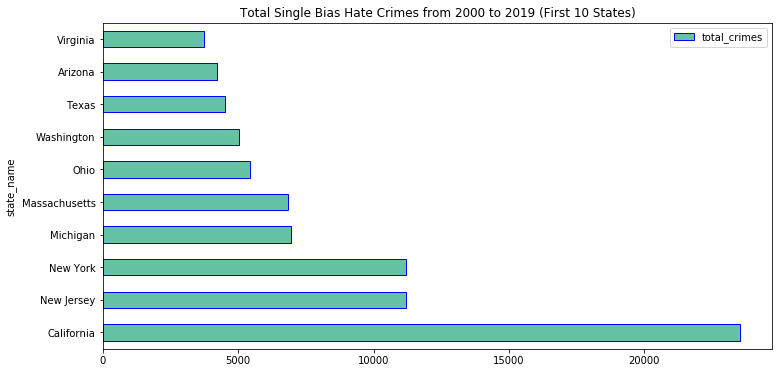

In [24]:
state_crimes = hate_crime_and_policing[hate_crime_and_policing.data_year > 1999]
state_crimes_bar = state_crimes.groupby("state_name")[["total_crimes"]].agg(sum).sort_values(by = 
                                                                          "total_crimes", ascending = 
                                                                          False).head(10).plot.barh(colormap =
                                                                                                    'Set2',edgecolor='blue')
rcParams['figure.figsize'] = 12,6
plt.title("Total Single Bias Hate Crimes from 2000 to 2019 (First 10 States)")

#### Inference

The above bar chart shows that more than 20,000 hate crimes were reported in California in the last 2 decades. The same state is touted to be the most multicultural state of US. 

New York and New Jersey is in the second and third place respectively. Ohio being the seventh most populated state currently ranks sixth with the hate crimes rate.  

### 3) 7 highest hate crimes in Ohio in the last decade based on the bias

C:\Users\Paaras Saxena\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


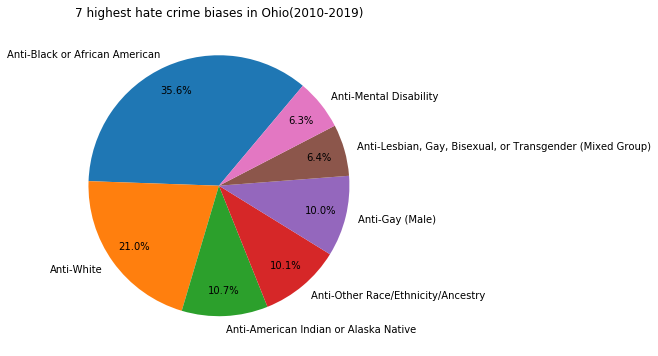

In [25]:
ohio_crime = hate_crime_clean[(hate_crime_clean["state_name"] == "Ohio") & (hate_crime_clean["data_year"] > 2010)]
#ohio_crime1 = ohio_crime.bias_desc.value_counts(normalize = True).head(7).mul(100).round(1).astype(str) + '%'
ohio_crime.bias_desc.value_counts().head(7).mul(100).round(1).plot.pie(autopct = '%2.1f%%', 
                                                                                startangle= 50, 
                                                                                shadow=False,
                                                                                rotatelabels = False,
                                                                               pctdistance = 0.8)
plt.title("7 highest hate crime biases in Ohio(2010-2019)")
plt.axes().set_ylabel('')
rcParams['patch.edgecolor'] = 'white'
rcParams['figure.figsize'] = 6,6

# Inference

The above output shows first 7 communities that suffered a greater number of hate crimes in Ohio state in the last decade.
* Black or African American community were most discriminated with more than quarter of the total hate crimes reported were against them. Black population accounts for around 13 - 14% of Ohio's total population. This concludes that the scale of hate crimes against black community was huge.
* White community suffered a significant percentage of hate crime as well with 21% among the first seven biases. 
* There were good number of Single bias hate crimes that were Anti-LGBTQ. This acts as a proof to the below article in nbcnews which states that 1 in 5 hate crimes were targeted towards LGBTQ.
(https://www.nbcnews.com/feature/nbc-out/nearly-1-5-hate-crimes-motivated-anti-lgbtq-bias-fbi-n1080891)
* People with mental disorder have also been subjected to hate crimes in Ohio if the last decade.

### 4) Anti-Black or African-American Hate Crimes in Ohio in the last 2 decades

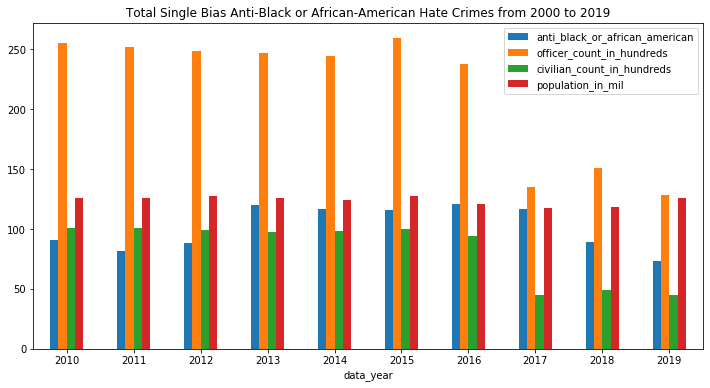

In [26]:
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12,6
ohio_bar = hate_crime_and_policing[(hate_crime_and_policing["state_name"] == "Ohio")  & (hate_crime_and_policing["data_year"] > 2009)]
ohio_bar["officer_count_in_hundreds"] = (ohio_bar["officer_count"])/100
ohio_bar["civilian_count_in_hundreds"] = (ohio_bar["civilian_count"])/100
ohio_bar = ohio_bar.set_index("data_year")
ohio_bar1 = ohio_bar[["anti_black_or_african_american", "officer_count_in_hundreds", "civilian_count_in_hundreds", "population_in_mil"]]
ohio_bar1.plot(kind = 'bar')
plt.xticks(rotation='horizontal')
plt.title("Total Single Bias Anti-Black or African-American Hate Crimes from 2000 to 2019")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

#### Inference

Here is the grouped bar chart spanning from 2010 to 2019 upon total single hate crimes with anti_black_or african_american bias, officer and civilian counts in 100s and population in millions in Ohio State.

* It can been seen that there was no drastic increase in population over the years. However, the number of police employee drastically decreased in the years 2017, 2018 and 2019. 
* The number of Single Bias crimes was high during years 2013-2017. However, it gradually reduced in 2018 and 2019. 

### 5) Anti-LGBTQ hate crimes in Midwest region(1991-2019)

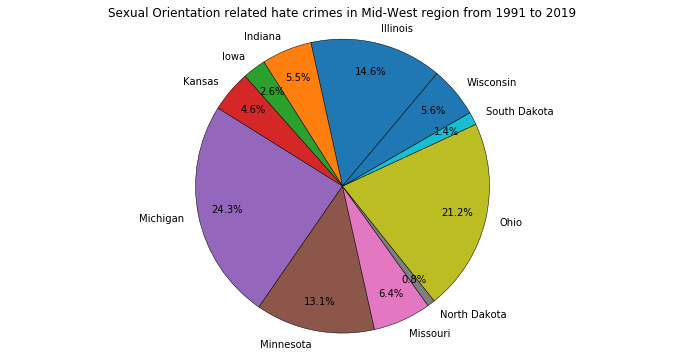

In [27]:
lgbtq_hate = hate_crime_and_policing[["region_name", "state_name","anti_bisexual","anti_gay_(male)","anti_gender_non_conforming","anti_heterosexual","anti_lesbian_(female)","anti_lesbian_gay_bisexual_or_transgender_(mixed_group)", "anti_transgender"]]
lgbtq_hate_mw = lgbtq_hate[lgbtq_hate["region_name"] =="Midwest"]
lgbtq_hate_mw['lgbtq_hate_crimes']=lgbtq_hate_mw.iloc[:,2:9].sum(axis=1)
lgbtq_hate_mw.head(10)
lgbtq_hate_mw.groupby("state_name")["lgbtq_hate_crimes"].agg(sum).plot.pie(autopct = '%2.1f%%', 
                                                                                startangle= 50, 
                                                                                shadow=False,
                                                                                rotatelabels = False,
                                                                               pctdistance = 0.8,
                                                                               wedgeprops={"edgecolor":"black",'linewidth': 0.5, 'antialiased': True}).axis('equal')
plt.title("Sexual Orientation related hate crimes in Mid-West region from 1991 to 2019")
plt.axes().set_ylabel('')
rcParams['patch.edgecolor'] = 'white'
rcParams['figure.figsize'] = 6,6

#### Inference

The above pie chart shows percentages of Sexual Orientation related hate crimes in Mid-West region from 1991 to 2019. This include Single Bias hate crimes such as : 
* anti_bisexual 
* anti_gay_(male) 
* anti_gender_non_conforming
* anti_heterosexual 
* anti_lesbian_(female) 
* anti_lesbian_gay_bisexual_or_transgender_(mixed_group) 
* anti_transgender

It is seen that almost quarter of the hate crimes were reported in Michigan state making it most unsafe for LGBTQ community in the mid west region compared to other states. Ohio state stands second here with over 21.2% of total LGBTQ related hate crimes. It was then followed by Illinios and Minnesota

### 6) Anti-Asian hate crimes in New York before COVID-19 pandemic

<Figure size 864x432 with 0 Axes>

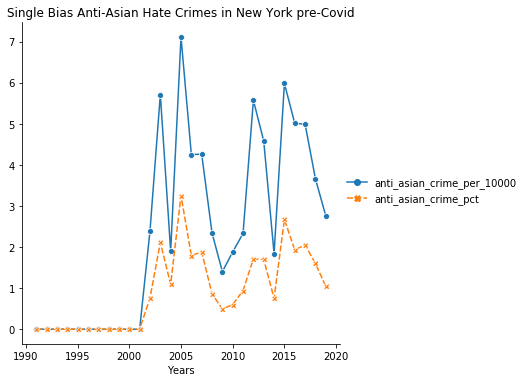

In [28]:
ny_asian_hate = pd.DataFrame(hate_crime_and_policing[(hate_crime_and_policing["state_name"] == "New York")][['data_year','anti_asian', 'total_crimes', 'population_in_mil']])
ny_asian_hate['anti_asian_crime_per_10000'] = round((ny_asian_hate['anti_asian']/ny_asian_hate['population_in_mil'])*100,2)
ny_asian_hate['anti_asian_crime_pct'] = round((ny_asian_hate['anti_asian']/ny_asian_hate['total_crimes'])*100,2)
ny_asian_hate = ny_asian_hate.set_index('data_year')
plt.figure(figsize=(12,6))
sns.relplot(data=ny_asian_hate[["anti_asian_crime_per_10000",'anti_asian_crime_pct']], kind="line", markers=True)
plt.title("Single Bias Anti-Asian Hate Crimes in New York pre-Covid")
plt.xlabel('Years')
plt.show()

#### Inference

https://www.nbcnewyork.com/news/national-international/race-in-america/anti-asian-hate-crimes-increased-nearly-150-in-2020-mostly-in-nyc-and-la-report/2933571/

* The above article states anti-Asian hate crimes increased nearly 150% in 2020, Majority of it is in New York.
* The blue line shows the count of anti-Asian hate crimes per population of 10,000s. 
* The orange dotted line shows the percentage of anti-Asian hate crimes in total hate crimes of that year.  
* The fact that these two lines are in sync shows how prevalent anti-Asian hate crimes were even before covid era. 

### 7) Anti-Disability hate crimes- US Regions(1991-2019)

AxesSubplot(0.135,0.125;0.755x0.755)


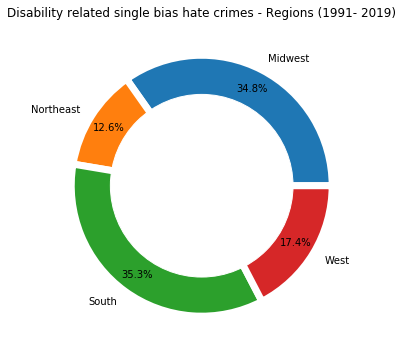

<Figure size 864x432 with 0 Axes>

In [29]:
#https://www.python-graph-gallery.com/161-custom-matplotlib-donut-plot
disability_hate = pd.DataFrame(hate_crime_and_policing[["region_name", "state_name", "anti_physical_disability", "anti_mental_disability"]])
disability_hate['disability_hate_crimes']=disability_hate.iloc[:,2:4].sum(axis=1)
disability_hate.head(10)
disability_hate_region = disability_hate.groupby("region_name")["disability_hate_crimes"].agg(sum).plot.pie(wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },
                                                                                                           autopct = '%2.1f%%', pctdistance = 0.84)
print(disability_hate_region)

my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Disability related single bias hate crimes - Regions (1991- 2019)")
plt.axes().set_ylabel('')
rcParams['patch.edgecolor'] = 'white'
plt.figure(figsize=(12,6))
plt.show()

#### Inference
* Anti-Mental Disability and Anti-Physical Disability hate crimes were higher in Southern and Midwest US over the years 1991-2019. It was more than the sum of both Northest and West US. 

### Model

### K- Means Clustering : Which US States were similarly safe in 2019 in terms of hate crimes?

Clustering is a process of dividing a data into groups of similar data points ie) Data points in the same cluster exhibits some explainable strong relationship among them than the data points of other cluster. Clustering is used in various domains such as Amazon’s recommendation system, marketing a new product by a retail company, credit scoring in a bank etc. **Here, clustering is used to understand which states of US were similarly safe compared to the other in 2019?**

K-Means Clustering belongs to Exclusive Clustering type which denotes that the data points belong exclusively to one single cluster. There may not be any overlapping of clusters and data points of one cluster will be in no means related to data points of other cluster. 
Additionally, here the number of clusters are denoted by K. K clusters are decided by the algorithm based on the parameters passed to it. 

#### Parameter Selection

In [30]:
#Related Citations - https://www.kaggle.com/akshayreddykotha/us-crime-rate-k-means-clustering/data
hate_crime_2019 = pd.DataFrame(hate_crime_and_policing[hate_crime_and_policing["data_year"] == 2019])[["state_name", "officer_count", "civilian_count", "population_in_mil", "total_crimes"]]
hate_crime_2019.head(10)

,state_name,officer_count,civilian_count,population_in_mil,total_crimes
1314,Iowa,5648.0,3090.0,33.88,10
1315,Illinois,29461.0,10591.0,127.44,58
1316,Indiana,8958.0,3558.0,75.59,86
1317,Kansas,8103.0,3704.0,34.82,71
1318,Michigan,18271.0,7137.0,105.96,361
1319,Minnesota,11213.0,6258.0,67.33,102
1320,Missouri,15864.0,6309.0,69.01,90
1321,North Dakota,1774.0,673.0,7.92,17
1322,Ohio,12890.0,4484.0,125.78,336
1323,South Dakota,1844.0,1355.0,9.57,15


* For this model, total count of single bias hate crimes,  police employee counts and population in million at the year 2019 were chosen as the parameters. 

#### Correlation check between the parameters

In [31]:
crime_2019_num = pd.DataFrame(hate_crime_2019.select_dtypes(include=np.number))
crime_2019_num.corr().style.background_gradient(cmap="coolwarm")

,officer_count,civilian_count,population_in_mil,total_crimes
officer_count,1.000000,0.938030,0.955008,0.769478
civilian_count,0.938030,1.000000,0.952391,0.686608
population_in_mil,0.955008,0.952391,1.000000,0.729079
total_crimes,0.769478,0.686608,0.729079,1.000000


* All the numerical columns were checked for correlation. Correlation helps to understand the strength of linear relationship between 2 parameters. It is seen here that all the parameters exhibit strong positive linear relationship with each other. 

#### Checking the range of parameters

In [32]:
crime_2019_num.describe()

,officer_count,civilian_count,population_in_mil,total_crimes
count,50.000000,50.000000,50.000000,50.000000
mean,14143.840000,6223.020000,67.788000,138.600000
std,16336.316266,8422.075854,75.443699,201.182829
min,1271.000000,356.000000,5.900000,2.000000
25%,2920.000000,1313.000000,19.210000,25.250000
50%,9148.500000,4042.000000,46.220000,59.000000
75%,16976.250000,6296.250000,76.715000,155.000000
max,79616.000000,41635.000000,396.920000,978.000000


* Any clustering model requires the parameters to be normally distributed. Above table shows the distribution of different parameters. It is seen that they are not of similar range and needs normalization before serving as a model input. 

#### Standardization of parameters

In [33]:
crime_2019_norm = pd.DataFrame(preprocessing.scale(crime_2019_num))
crime_2019_norm.describe()

,0,1,2,3
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.110223e-17,-7.771561e-17,4.440892e-17,1.332268e-17
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-7.959892e-01,-7.036965e-01,-8.286487e-01,-6.858778e-01
25%,-6.940237e-01,-5.889129e-01,-6.504346e-01,-5.691380e-01
50%,-3.088858e-01,-2.615938e-01,-2.887845e-01,-3.996770e-01
75%,1.751415e-01,8.783282e-03,1.195280e-01,8.234551e-02
max,4.048457e+00,4.247350e+00,4.406909e+00,4.214684e+00


* Here, the data is normalized using preprocessing.scale() function and the parameters fall in the same range. 

#### Selecting the number of K clusters - Elbow Method

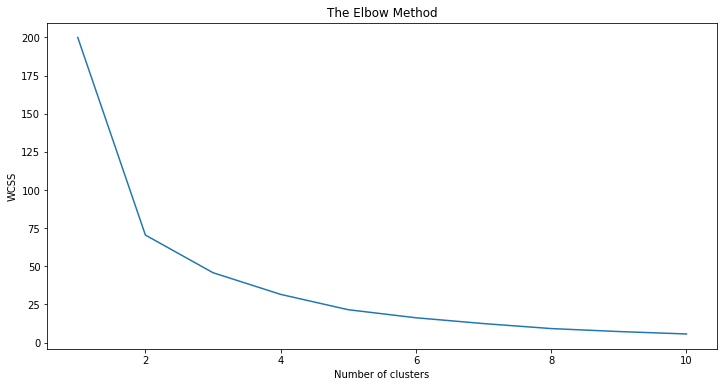

In [34]:
# Code Citation - https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
# Concept Citation - https://www.edupristine.com/blog/beyond-k-means
plt.figure(figsize=(12, 6))
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    k_means.fit(crime_2019_norm)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* To predict the number of clusters K, Elbow method is used. It is one of the widely used methods to find out the optimal number of clusters. This method works by taking the sum of distances of data points from the cluster centroids called as Within-Cluster-Sum-of-Squares (WCSS). This code gives a plot of WCSS against the Number of Clusters. The “elbow” point at which the WCSS drops with increasing clusters is chosen as K. Here, we get to see that happening at k = 3. Thus, the number of clusters chosen here is 3. 
* Here, the algorithm picks 3 initial clusters and adds the data points to the cluster with the nearest mean, again recalculates the mean each time a new point is added to the cluster. This continues with each iteration that is declared and stops when the data points in each cluster stops changing. 

#### K Means model and prediction

In [35]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)
k_cluster = list(k_means.fit_predict(crime_2019_norm))
crime_2019_num['k_cluster'] = k_cluster
hate_crime_2019['k_cluster'] = k_cluster

* The above found k clusters are used to predict the clusters of input data using KMeans function. 
* The fit values from the model ie) the column with respective cluster numbers are added to the original datasets and used for interpretation.

#### Count of states in each cluster

In [36]:
crime_2019_num.groupby('k_cluster')['k_cluster'].count()

k_cluster
0    14
1     4
2    32
Name: k_cluster, dtype: int64

* Grouping the dataframe based on K_cluster column renders an output where a total of 14, 4 and 32 states are in cluster 0, 1 and 2 respectively. 

#### Plotting Hate Crimes Vs. Other parameters with respect to different clusters

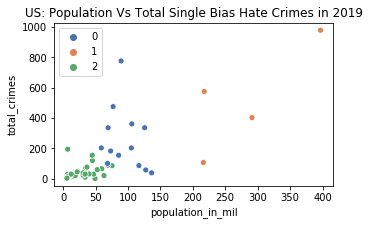

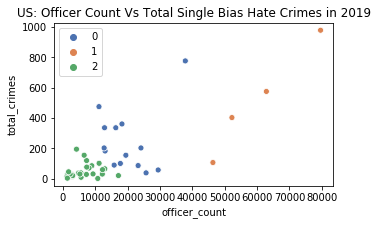

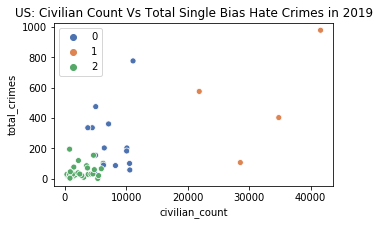

In [37]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=crime_2019_num['population_in_mil'], y = crime_2019_num['total_crimes'] , palette="deep", hue = k_cluster)
plt.title("US: Population Vs Total Single Bias Hate Crimes in 2019")
plt.show()
plt.figure(figsize=(5,3))
sns.scatterplot(x=crime_2019_num['officer_count'], y = crime_2019_num['total_crimes'] , palette="deep", hue = k_cluster)
plt.title("US: Officer Count Vs Total Single Bias Hate Crimes in 2019")
plt.show()
plt.figure(figsize=(5,3))
sns.scatterplot(x=crime_2019_num['civilian_count'], y = crime_2019_num['total_crimes'] , palette="deep", hue = k_cluster)
plt.title("US: Civilian Count Vs Total Single Bias Hate Crimes in 2019")
plt.show()

* From the above plots, it is evident that states with very high population, higher police employee counts are included to cluster 1.  States with medium population and police employees are into cluster 0. Cluster 2 has states with comparatively less population and less police employees. 

#### Summary of parameters in each cluster

In [38]:
cluster_mean = pd.DataFrame(round(crime_2019_num.groupby('k_cluster').mean(), 2))
print(cluster_mean)

           officer_count  civilian_count  population_in_mil  total_crimes
k_cluster                                                                
0               19863.21         7413.36              93.50        243.07
1               60276.25        31736.25             280.48        515.75
2                5875.06         2513.09              29.95         45.75


* This table shows the mean of various parameters within each cluster. This gives a better picture of clustering based on the parameters given as input.

#### Visualization of US Map with states coloured based on its cluster

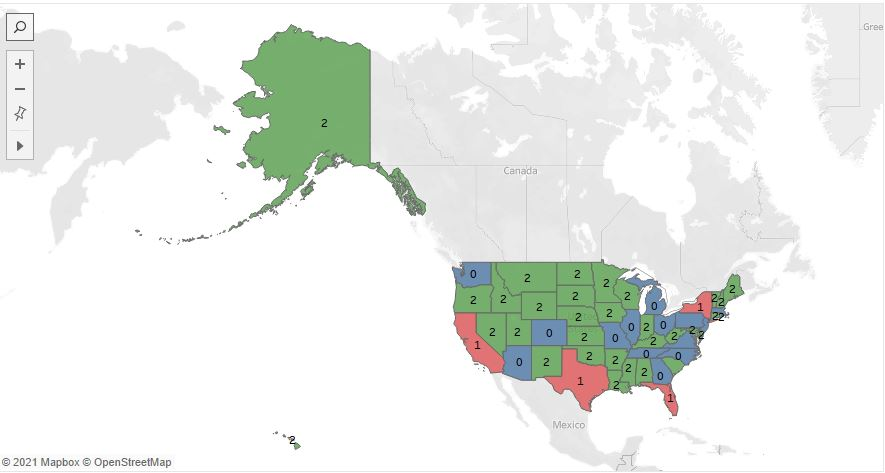

In [39]:
display.Image("crime_clusters.jpg")

# Plotting US map required installing external packages. Hence, the below plot was made in Tableau and attached here. 

### Conclusion :

* In Cluster 1 includes highly populated states such as California, Texas, Florida and NY. Single Bias hate crimes were higher here.
* Majority of the States from Mid-west region were included in Cluster 2 implying less population and lower single bias hate crimes rates. Similar case with majority of states in west US except Washington and California.
* Most of the states that fell into Cluster 0 were of Eastern US. These states had population, police employees and hate crime rates higher Cluster 2 states but lower than Cluster 1 states. 